# Exercise
## Plotting
1. Use the sinewave, chirp ( linear, quadratic, logarithnic, concave)
    - How does the signal look? What is on y-axis and x-axis?
    - Discuss Resolution of the signal, range, sampling frequency
    - Listen to them - Can you hear them? why?

## Frequency spectrum
2. Plot the spectra- Discuss their frequency content and relate to the auditory range of human hearing
3. Use the Hanning, rectangular and Hamming tapers to compute spectra
    - compare spectra between tapers
4. What is the samplng frequency in relation to Nyquist sampling theorem?

In [2]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')

In [3]:
def plotSpectrum(t, y,Fs):
    """
    Function to plot the time domain and frequency domain signal
    """
    N = 1024
    n = int(len(y)) # length of the signal
    N = n
    k = np.arange(N)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(N//2)] # one side frequency range
    han = sig.windows.hann(n)
    rect = sig.windows.boxcar(n)
    ham = sig.windows.hamming(n)
    
    #normal
    Y = np.fft.fft(y, N)/n # fft computing and normalization
    Y = Y[range(N//2)]    
    
    #hanninng 
    y_han = y * han
    Y_han = np.fft.fft(y_han, N)/n # fft computing and normalization
    Y_han = Y_han[range(N//2)]    
    
    #rectangular boxcar
    y_rect = y * rect
    Y_rect = np.fft.fft(y_rect, N)/n # fft computing and normalization
    Y_rect = Y_rect[range(N//2)]    
    
    #hamming
    y_ham = y * ham
    Y_ham = np.fft.fft(y_ham, N)/n # fft computing and normalization
    Y_ham = Y_ham[range(N//2)]    
    
    frq_len = len(frq)
    # plot time domain and frequency domain signal
    plt.figure(1)
    plt.plot(t,y)
    plt.title("Time Domain")
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.figure(2)
    plt.plot(frq[0:N//2],abs(Y[0:N//2]),'r')
    plt.title("Frequency Domain")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.figure(3)
    plt.plot(frq,abs(Y_han),'b')
    plt.title("Hanning Window")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.figure(4)
    plt.plot(frq,abs(Y_rect),'g')
    plt.title("Rectangular Window(Box car)")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.figure(5)
    plt.plot(frq,abs(Y_ham),'y')
    plt.title("Haming Window")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    
    plt.tight_layout()
    plt.show()

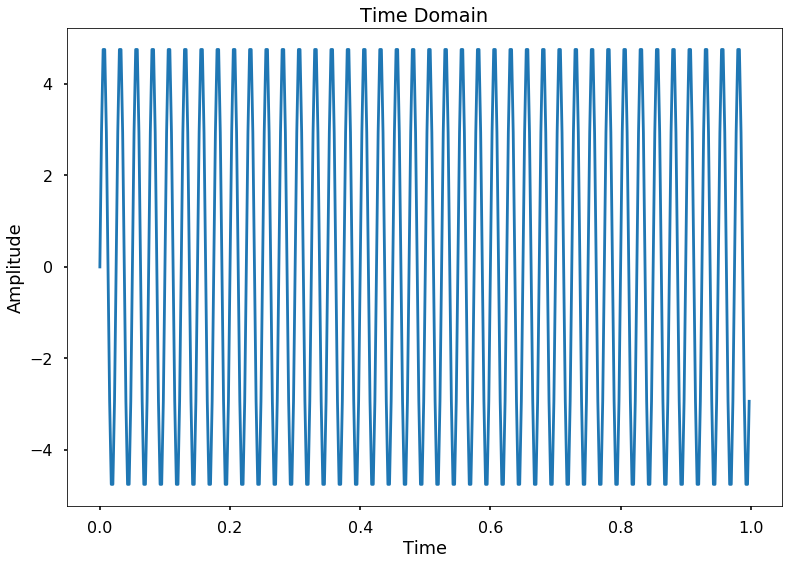

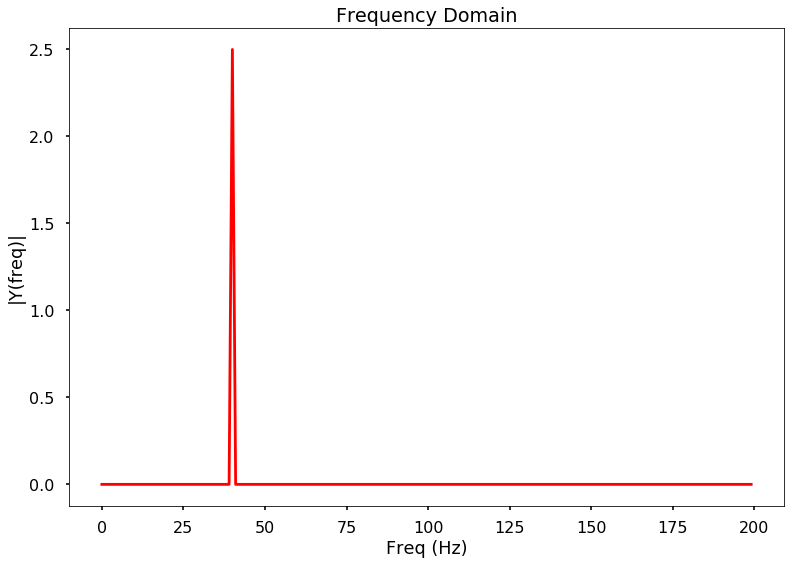

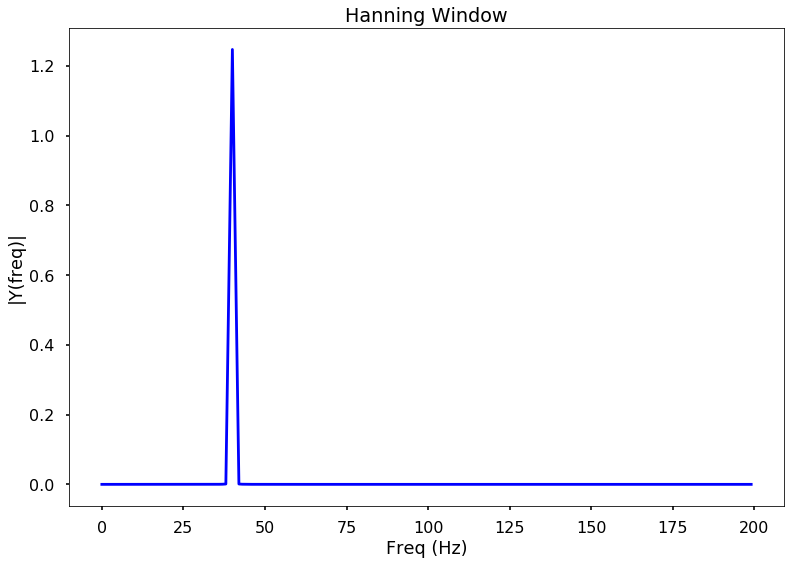

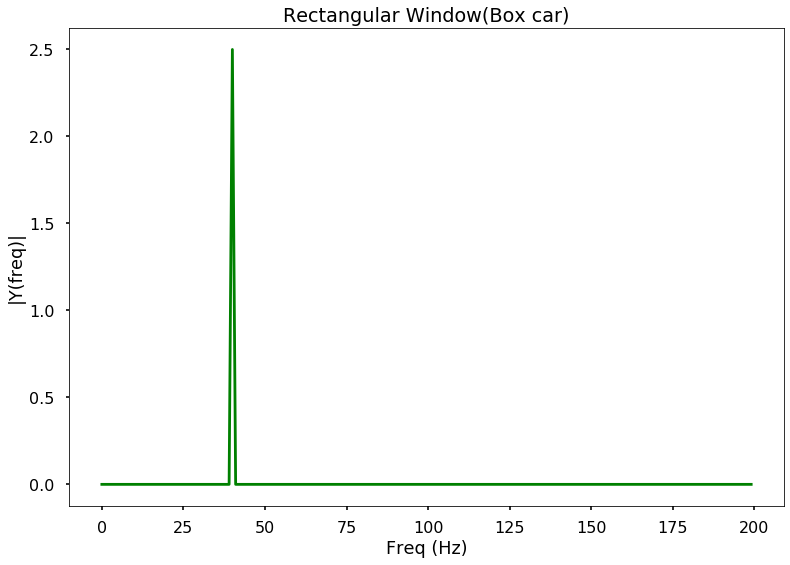

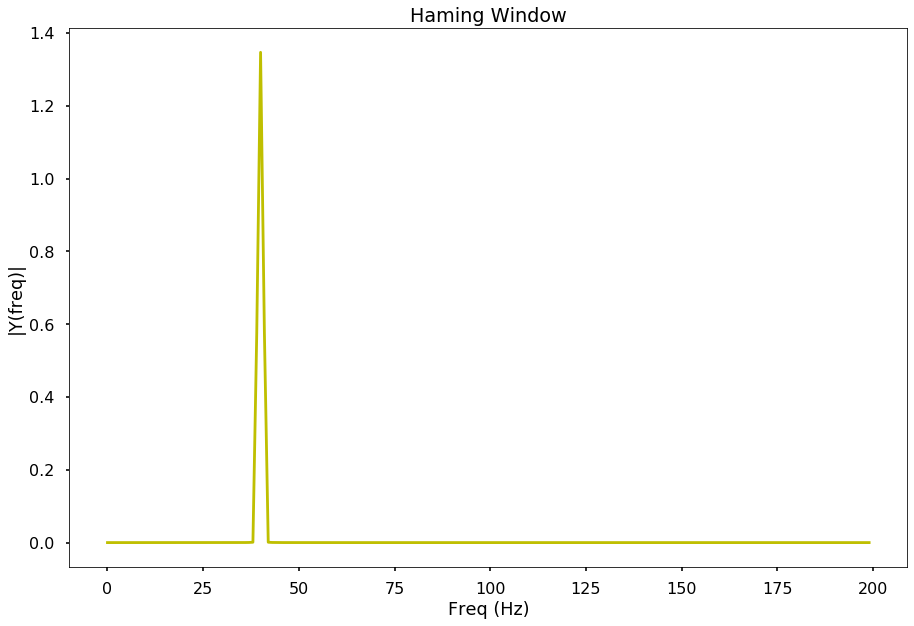

In [4]:
########################## SINE WAVE ################################

Fs = 400.0  # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector
f = 40
y_sin = 5 * np.sin(2*np.pi*f*n)

plotSpectrum(n, y_sin, Fs)

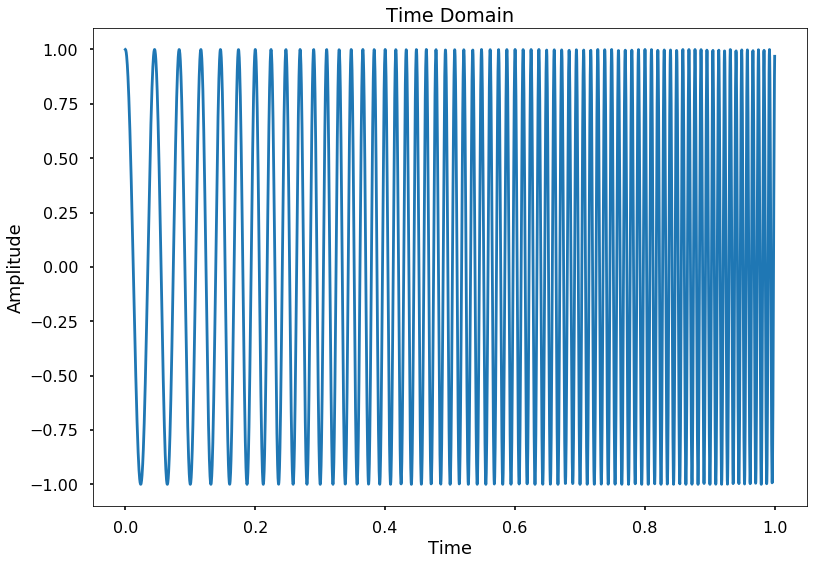

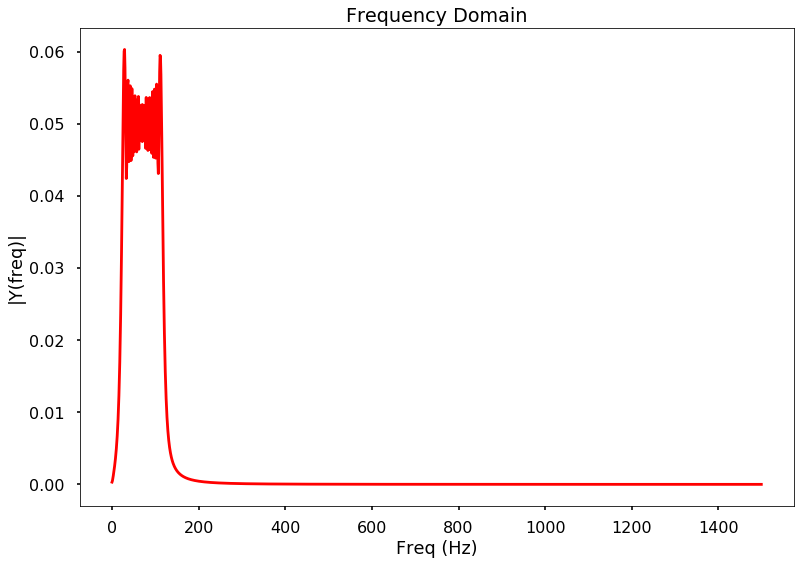

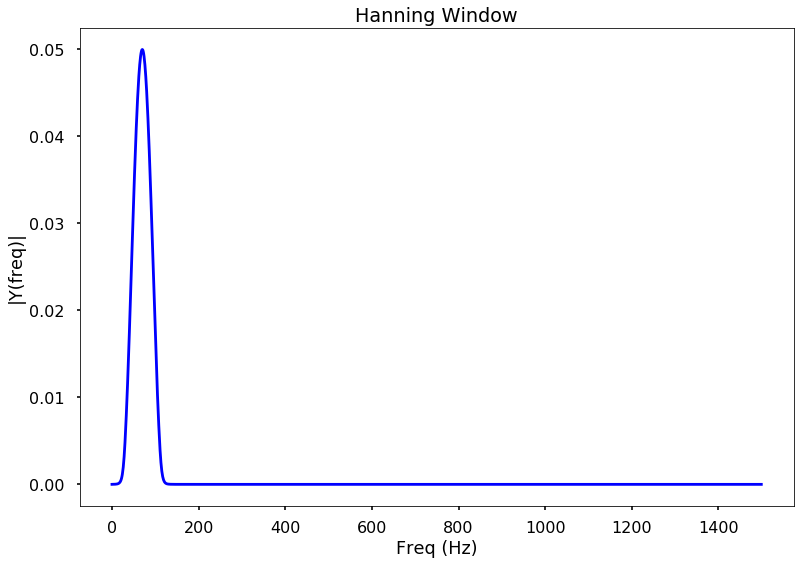

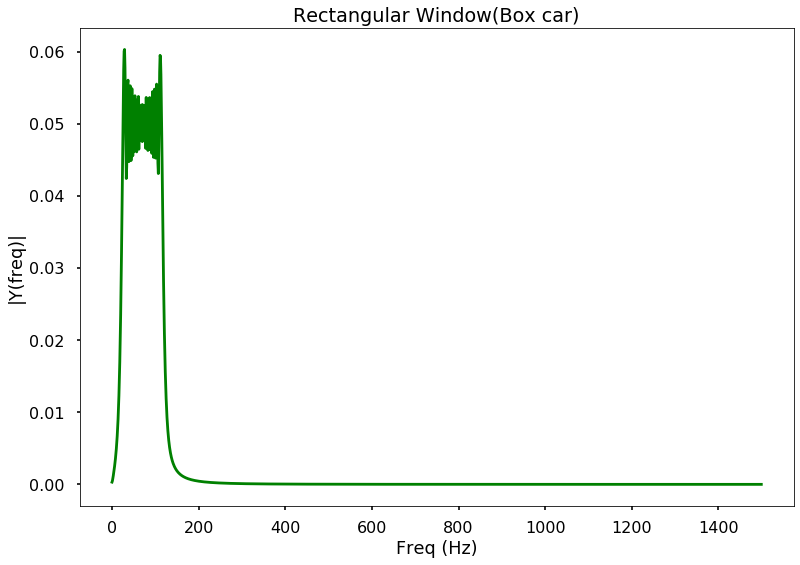

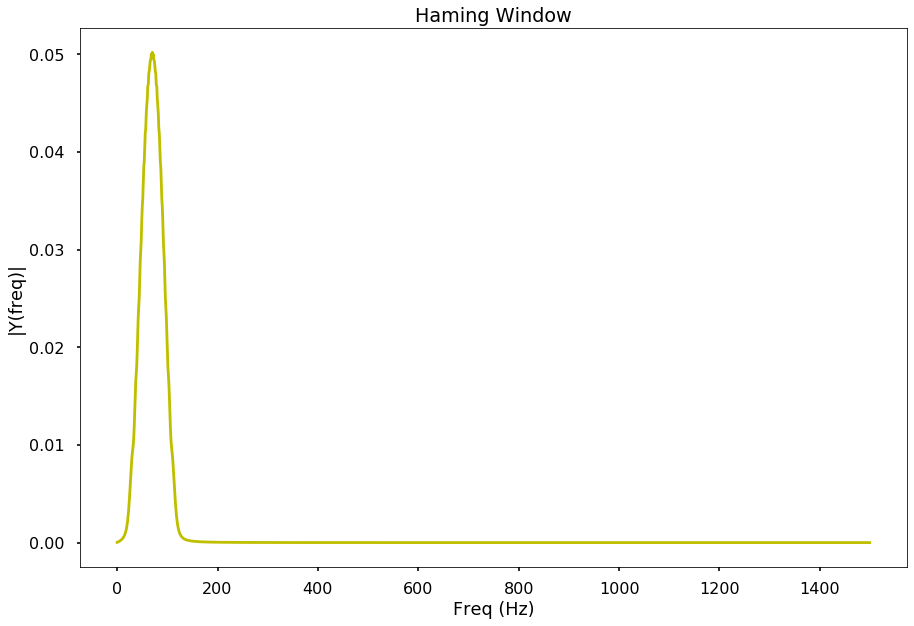

In [5]:
########################## Chirp - Linear ################################

Fs = 3000.0  # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector

f0 = 20
t1 = .2
f1 = 40

y_ch_lin = sig.chirp(n, f0, t1, f1, method="linear")

plotSpectrum(n, y_ch_lin, Fs)

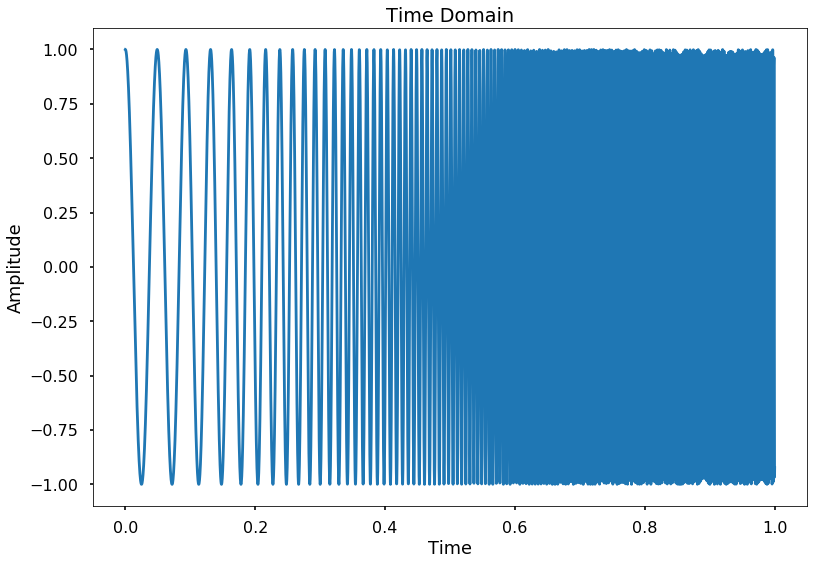

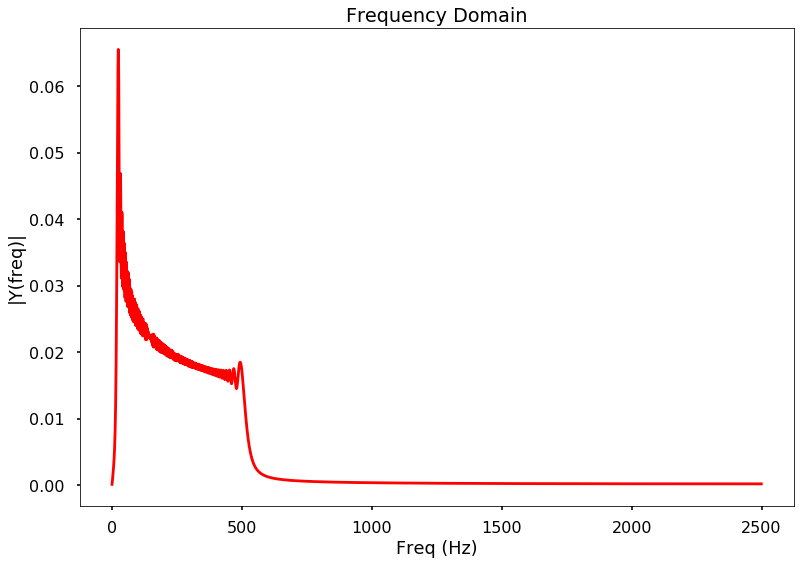

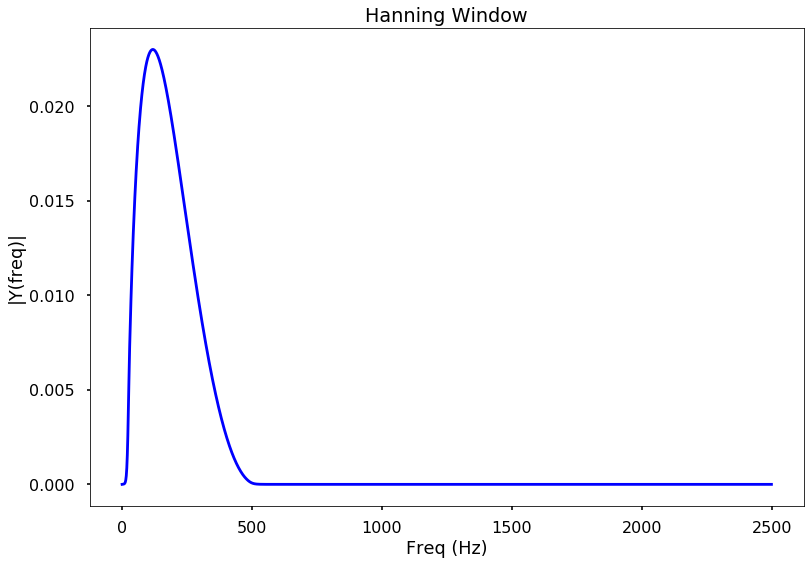

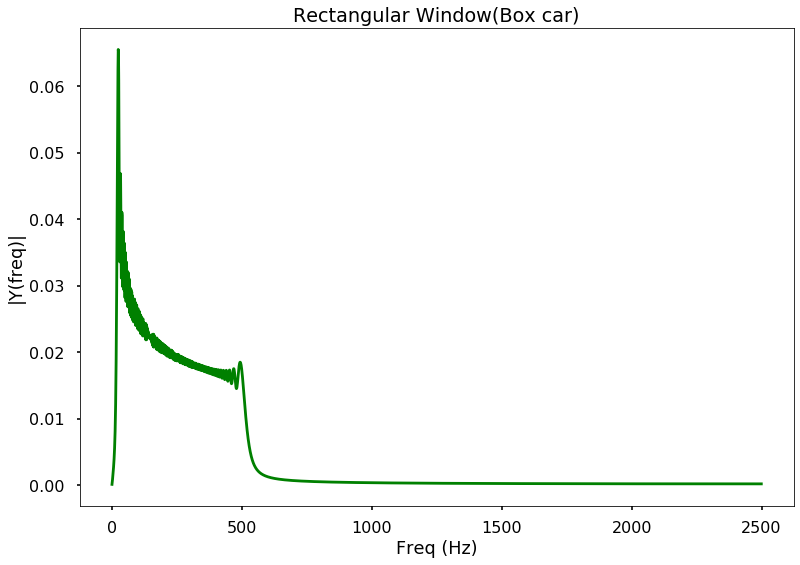

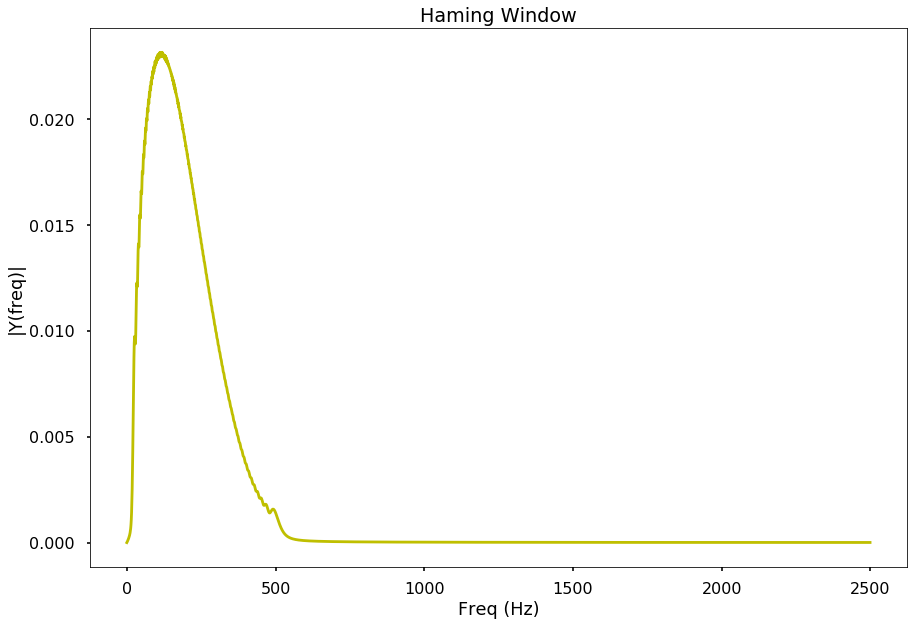

In [10]:
########################## Chirp - Quadratic ################################

Fs = 5000.0  # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector

f0 = 20
t1 = .2
f1 = 40

y_ch_quad = sig.chirp(n, f0, t1, f1, method="quadratic")

plotSpectrum(n, y_ch_quad, Fs)

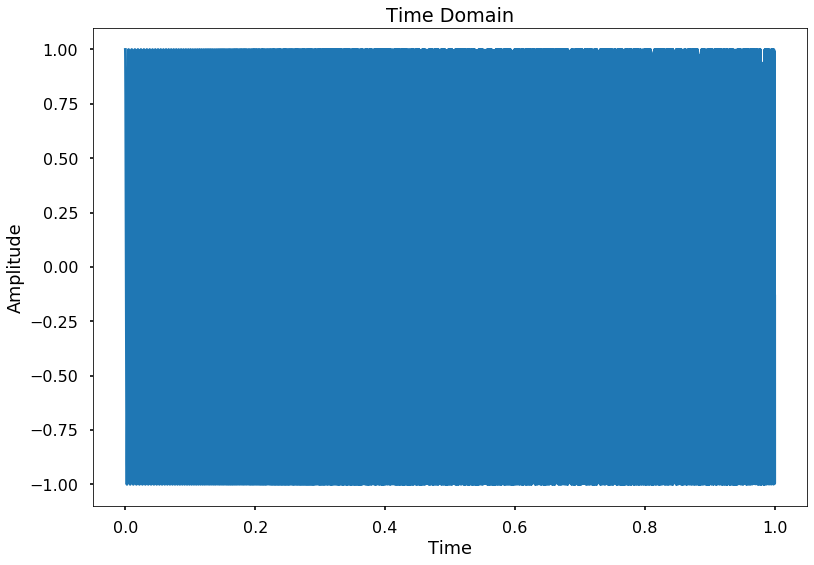

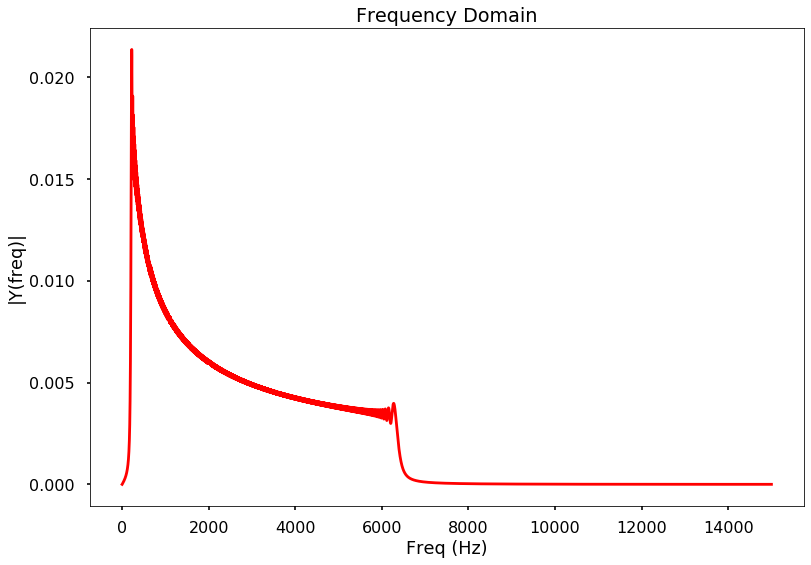

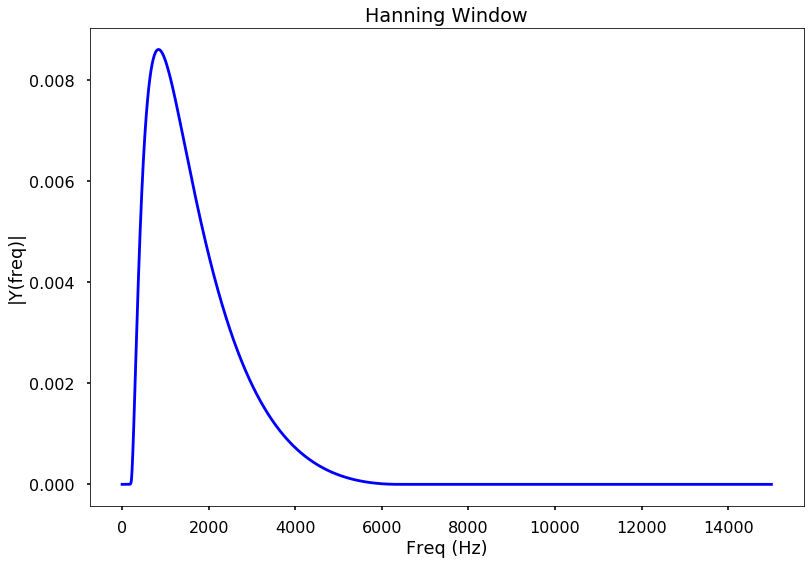

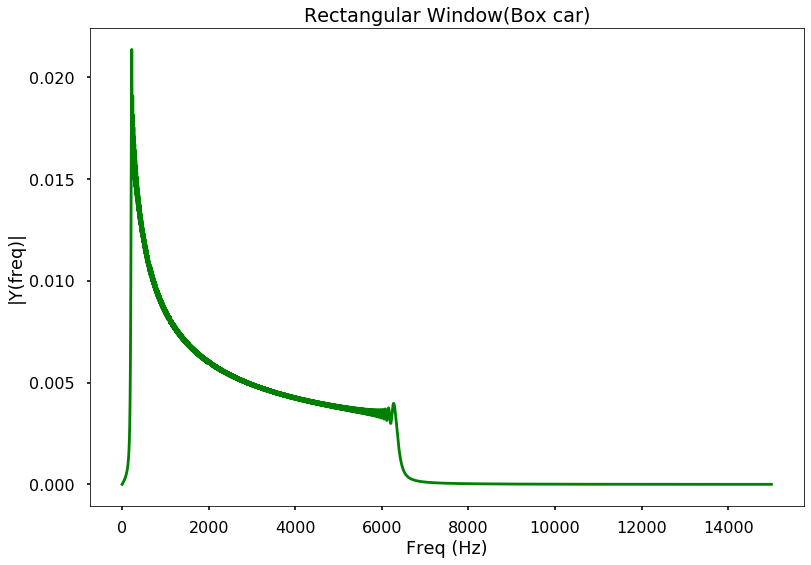

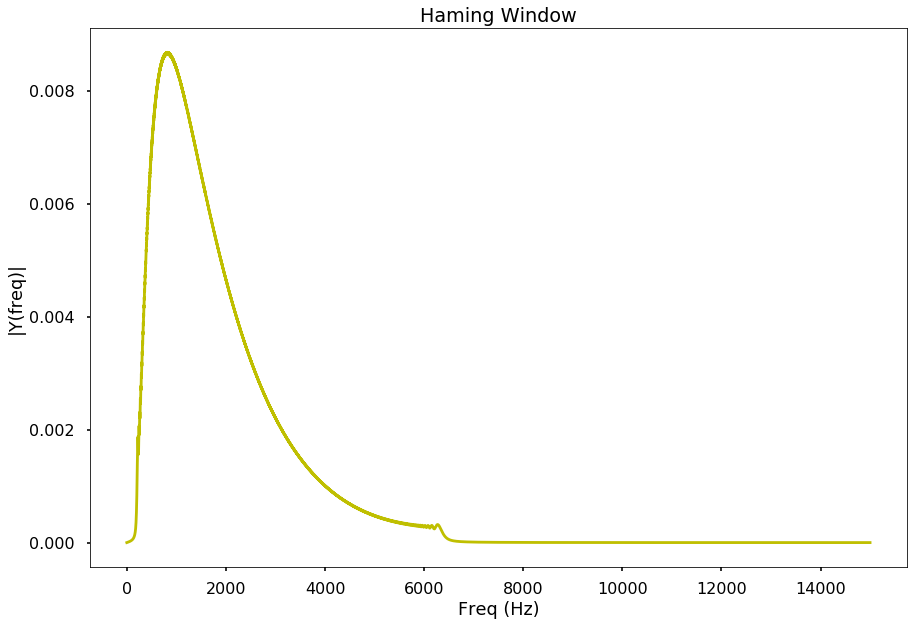

In [7]:
########################## Chirp - Logarithmic ################################

Fs = 30000.0  # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector

f0 = 200
t1 = .2
f1 = 400

y_ch_log = sig.chirp(n, f0, t1, f1, method="logarithmic")

plotSpectrum(n, y_ch_log, Fs)

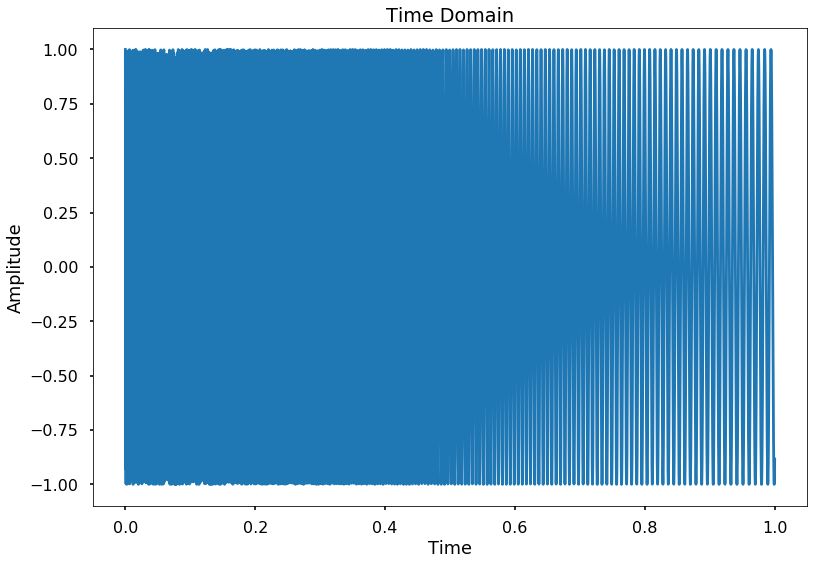

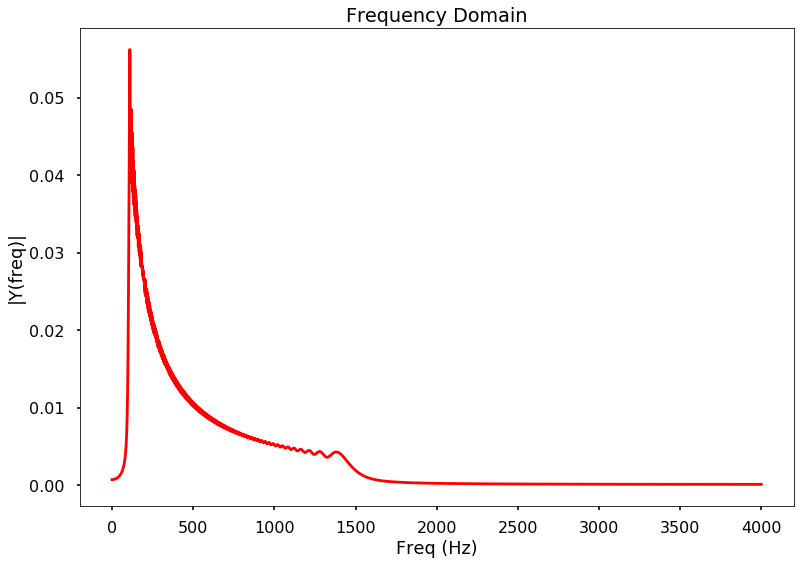

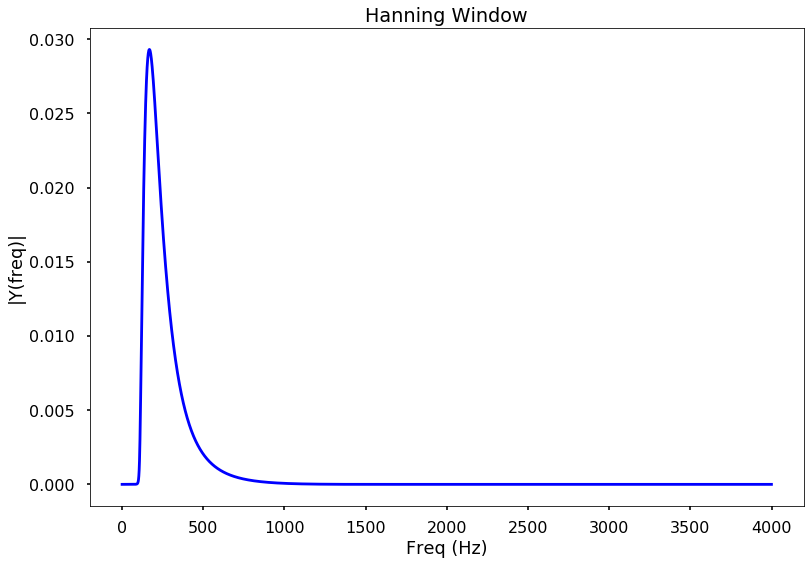

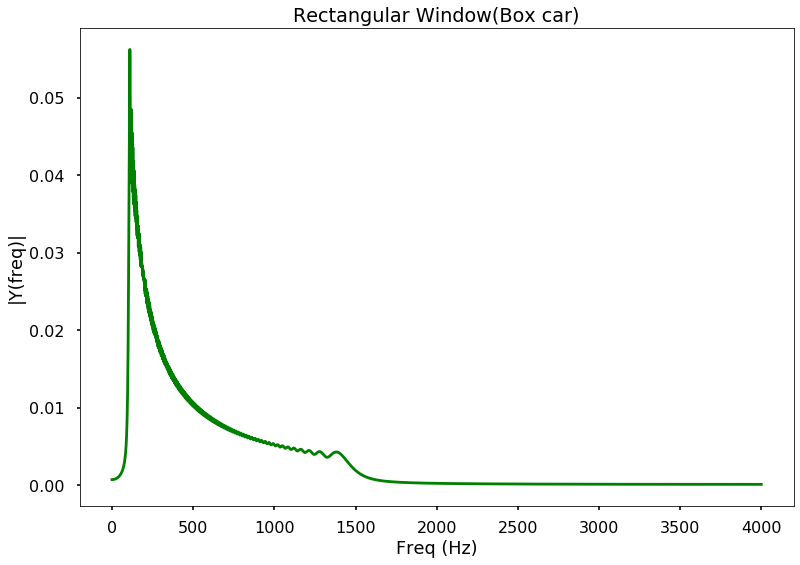

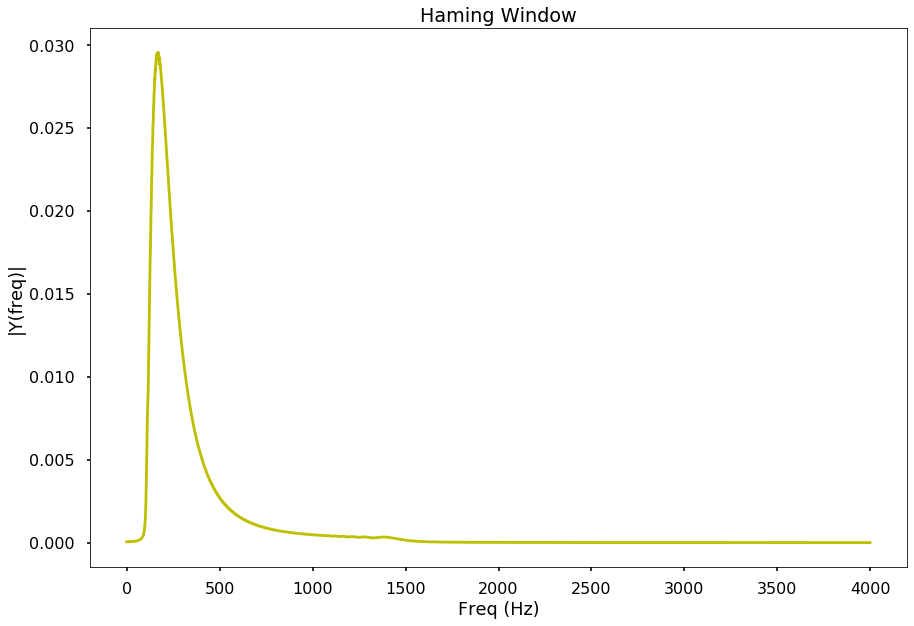

In [11]:
########################## Chirp - Hyperbolic ################################

Fs = 8000 # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector
f0 = 1500
t1 = .2
f1 = 400

y_ch_hyp = sig.chirp(n, f0, t1, f1, method="hyperbolic")

plotSpectrum(n, y_ch_hyp, Fs)


# Time-Frequency decomposition
5. Compute TFR using STFT, multitaper and wavelet decomposition
    - What time point elicits maximal frequency and is it comparable across methods?
    - Change the window sizes - has the frequency resolution changed?
    - How can you find out frequency resolution from the outputs?
    - Can you justify the change in frequency resolution?
    - Keeping window sizes fixed, can you double the frequency resolution? How?
    - Plot and show the results. Explain them.

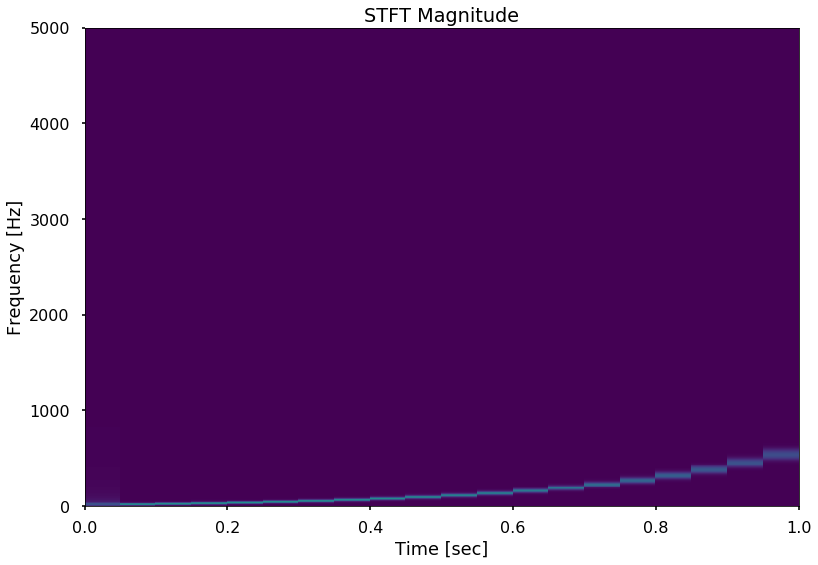

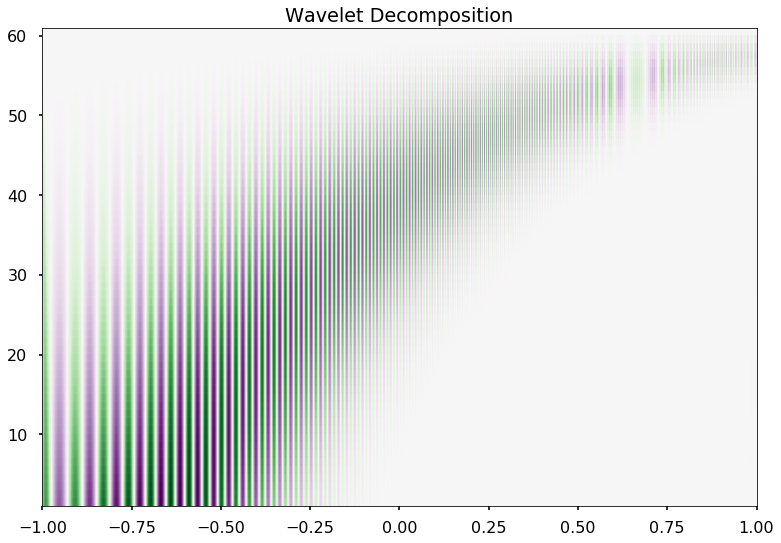

In [15]:
########################## Chirp - Logarithmic ################################

Fs = 10000.0  # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector

f0 = 20
t1 = .2
f1 = 40
amp = 5

y_ch_log = amp *sig.chirp(n, f0, t1, f1, method="logarithmic")

#STFT
f, t, Zxx = sig.stft(y_ch_log, Fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#Wavelet Decomposition
widths = np.arange(1, 61)
cwtmatr = sig.cwt(y_ch_log, sig.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 61], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Wavelet Decomposition')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
plt.show()

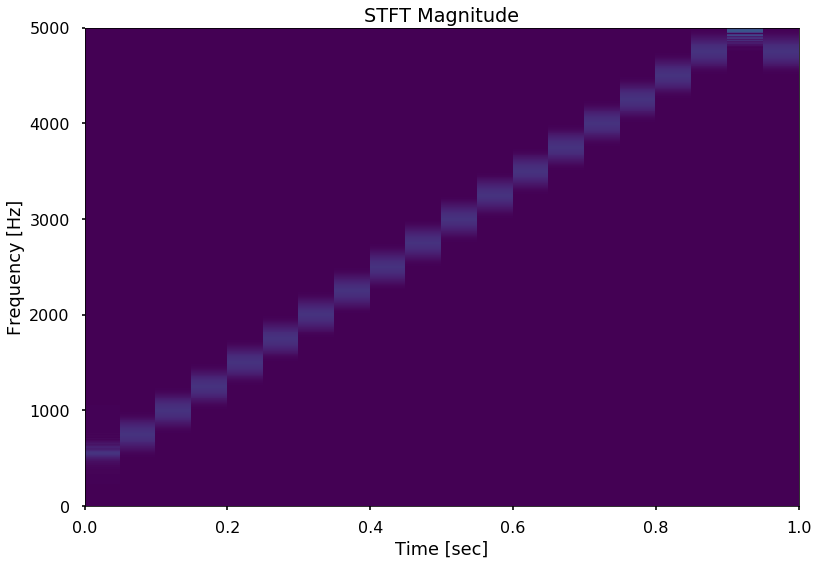

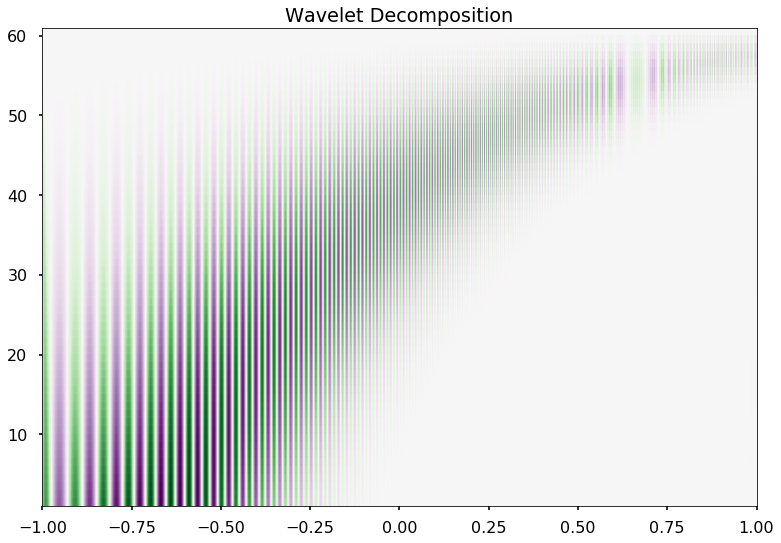

In [17]:

Fs = 10000 # sampling rate
Ts = 1.0/Fs # sampling interval
n = np.arange(0,1,Ts) # time vector
f0 = 500
t1 = .2
f1 = 1500
amp = 2

y_ch_hyp = amp * sig.chirp(n, f0, t1, f1, method="linear")


#STFT
f, t, Zxx = sig.stft(y_ch_hyp, Fs, nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=amp)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

#Wavelet Decomposition
widths = np.arange(1, 61)
cwtmatr = sig.cwt(y_ch_log, sig.ricker, widths)
plt.imshow(cwtmatr, extent=[-1, 1, 1, 61], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.title('Wavelet Decomposition')
#plt.ylabel('Frequency [Hz]')
#plt.xlabel('Time [sec]')
plt.show()

# Filter design
6. Design a low-, high-, bandpass and band-reject butter worth filter
    - Use the "fdatool" in MATLAB or pyFDA in python
    - Filter settings
        - LPF - 100 Hz
        - HPF - 0.1 Hz, 1 Hz
        - BPF - 0.1-100 Hz, 1-100 HZ
        - BSP - 45-55 Hz
    - Change the order of the filter - how does the roll-off rate change? What is the relation between roll-off rate and order of the filter?
    - How do the passband/stopband ripple, stopband attenuation look like?
    - Sampling frequency - 1000 Hz
    - Chagne the order of the filter - how does the roll-off rate change?
    - How do the passband/stopband ripple, stopband attenuation look like?
    - Look at the phase response for each of the filters. What does it indicate? is it linear? Why is it important that it is linear? whatwould happen if the phase response of the filter is non-linear in the passband?
        

### Filter responses are attached in the folder

7. Phase responses
    - Compute the response of (i)forward, (ii) reverse and (iii) forward-reverse filter for a simple Gaussian signal train. Match it with the input signal and see how response changes with mode of filtering.
    - How can you perform a zero-phase filtering in this scenario?

# Bivariate spectral decomposition
8. Coherence
    - Generate a bivariate time series of two known common frequency contents
    - Calculate the mean-squared coherence and plot
    - How does it look? Have you got back the overlapping spectra?